In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from sklearn.model_selection import train_test_split
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [197]:
# đọc dữ liệu từ file csv
df = pd.read_csv('E:\DL\VNM.csv', encoding='utf-8')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

           Ngày  Lần cuối        Mở       Cao      Thấp
0    12/09/2025  63,200.0  61,300.0  63,500.0  61,000.0
1    11/09/2025  61,200.0  59,800.0  61,200.0  59,400.0
2    10/09/2025  59,800.0  60,500.0  60,600.0  59,700.0
3    09/09/2025  60,300.0  60,600.0  61,000.0  60,100.0
4    08/09/2025  60,600.0  60,900.0  61,900.0  60,600.0
..          ...       ...       ...       ...       ...
665  09/01/2023  73,391.3  72,663.8  73,391.3  72,390.9
666  06/01/2023  72,572.8  73,664.1  73,846.0  72,390.9
667  05/01/2023  73,846.0  72,118.1  74,027.9  71,845.3
668  04/01/2023  72,118.1  71,572.4  72,118.1  71,481.5
669  03/01/2023  71,390.5  69,571.7  71,390.5  69,298.8

[670 rows x 5 columns]


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_2992\1141448510.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('E:\DL\VNM.csv', encoding='utf-8')


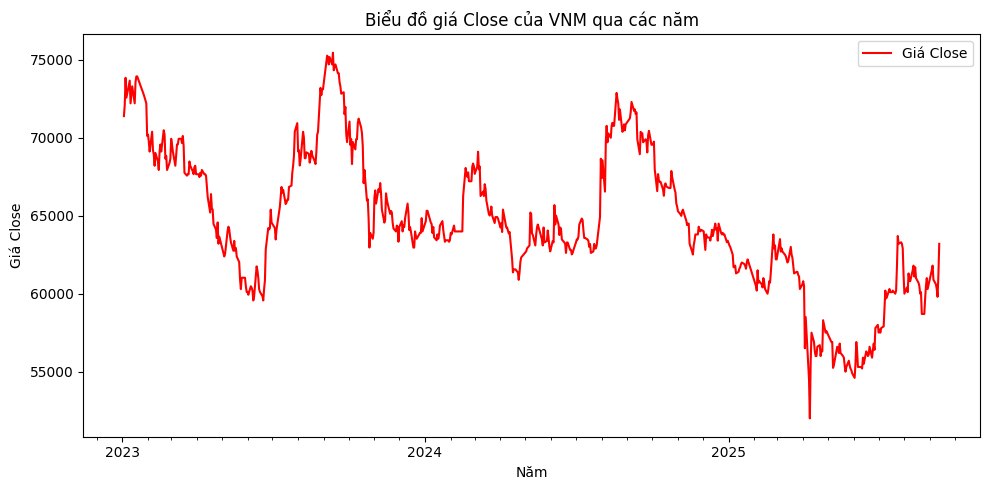

In [198]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Close'] = df['Lần cuối'].str.replace(',', '').astype(float)
df['Open'] = df['Mở'].str.replace(',', '').astype(float)
df['Highest'] = df['Cao'].str.replace(',', '').astype(float)
df['Lowest'] = df['Thấp'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá Close qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Close'], label='Giá Close', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá Close')
plt.title('Biểu đồ giá Close của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [199]:
import ta
# Tính toán các chỉ báo kỹ thuật
df['SMA_14'] = ta.trend.sma_indicator(df['Close'], window=14)
df['EMA_14'] = ta.trend.ema_indicator(df['Close'], window=14)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
macd = ta.trend.macd(df["Close"])
df["MACD"] = macd
df["MACD_signal"] = ta.trend.macd_signal(df["Close"])

In [200]:
df = df.fillna(0) # Thay thế giá trị NaN bằng 0

In [201]:
df1 = pd.DataFrame(df, columns=['Ngày','Close',"Open",'EMA_14','RSI','MACD'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Close,Open,EMA_14,RSI,MACD
Ngày,,,,,
2023-01-03,71390.5,69571.7,0.000000,0.000000,0.000000
2023-01-04,72118.1,71572.4,0.000000,0.000000,0.000000
2023-01-05,73846.0,72118.1,0.000000,0.000000,0.000000
2023-01-06,72572.8,73664.1,0.000000,0.000000,0.000000
2023-01-09,73391.3,72663.8,0.000000,0.000000,0.000000
...,...,...,...,...,...
2025-09-08,60600.0,60900.0,60684.437123,50.258444,123.590184
2025-09-09,60300.0,60600.0,60633.178840,48.391399,82.557616
2025-09-10,59800.0,60500.0,60522.088328,45.366477,9.582725


In [202]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80-20
train_size = int(len(df1) * 0.8)
train_data = df1[:train_size]
test_data = df1[train_size:]

In [203]:
train_data.shape

(536, 5)

In [204]:
train_data.shape
test_data.shape

(134, 5)

In [205]:
sc_x = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))
x_data = sc_x.fit_transform(df1)
y_data = sc_y.fit_transform(df1[["Close"]])


In [206]:
x_train, y_train =[],[]
for i in range(50, len(train_data)):
    x_train.append(x_data[i-50:i])
    y_train.append(y_data[i])

In [207]:
len(y_train)

486

In [208]:
x_test, y_test =[],[]
for i in range(len(train_data),len(df1)):
    x_test.append(x_data[i-50:i])
    y_test.append(y_data[i])

In [209]:
len(x_test)

134

In [210]:

class LSTMModel(nn.Module):
    def __init__(self, input_size=5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, 128, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(128 * 2, 1)  # Nhân đôi vì bidirectional

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])  # Lấy timestep cuối
        out = self.fc(out)
        return out

In [211]:
model = LSTMModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [212]:
x_train = np.array(x_train) 
y_train = np.array(y_train) 
x_test = np.array(x_test) 
y_test = np.array(y_test) 

In [213]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [214]:
y_test.shape

torch.Size([134, 1])

In [215]:
torch.manual_seed(42)
import copy

#set a number of epochs
epochs = 100


best_loss = float('inf')
best_model = None

# Build training and evaluation loop
for epoch in range(epochs):
    model.train()

    # forward
    y_pred = model(x_train)

    # tính loss (ví dụ: MSE)
    loss = loss_fn(y_pred, y_train)

    # reset gradient
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Đánh giá trên tập test
    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)

        test_loss = loss_fn(test_pred, y_test)

    # Ghi lại mô hình có test_loss tốt nhất
    if test_loss.item() < best_loss:
        best_loss = test_loss.item()
        best_model = copy.deepcopy(model.state_dict())  # lưu bản sao tham số tốt nhất

    # In ra mỗi 10 epoch
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch: 0 | Train Loss: 0.4580 | Test Loss: 0.1133
Epoch: 20 | Train Loss: 0.0206 | Test Loss: 0.0376
Epoch: 40 | Train Loss: 0.0107 | Test Loss: 0.0412
Epoch: 60 | Train Loss: 0.0048 | Test Loss: 0.0334
Epoch: 80 | Train Loss: 0.0036 | Test Loss: 0.0200


In [216]:
model0 = LSTMModel()
model0.load_state_dict(torch.load("lstm_weights3.pth"))
 # Đánh giá trên tập test
model0.eval()
with torch.inference_mode():
    test_pred = model0(x_test)

    test_loss = loss_fn(test_pred, y_test)

# Ghi lại mô hình có tes t_loss tốt nhất
if test_loss.item() < best_loss:
    best_loss = test_loss.item()
    best_model = copy.deepcopy(model0.state_dict())  # lưu bản sao tham số tốt nhất
# Lưu mô hình tốt nhất
torch.save(best_model, "lstm_weights3.pth") 

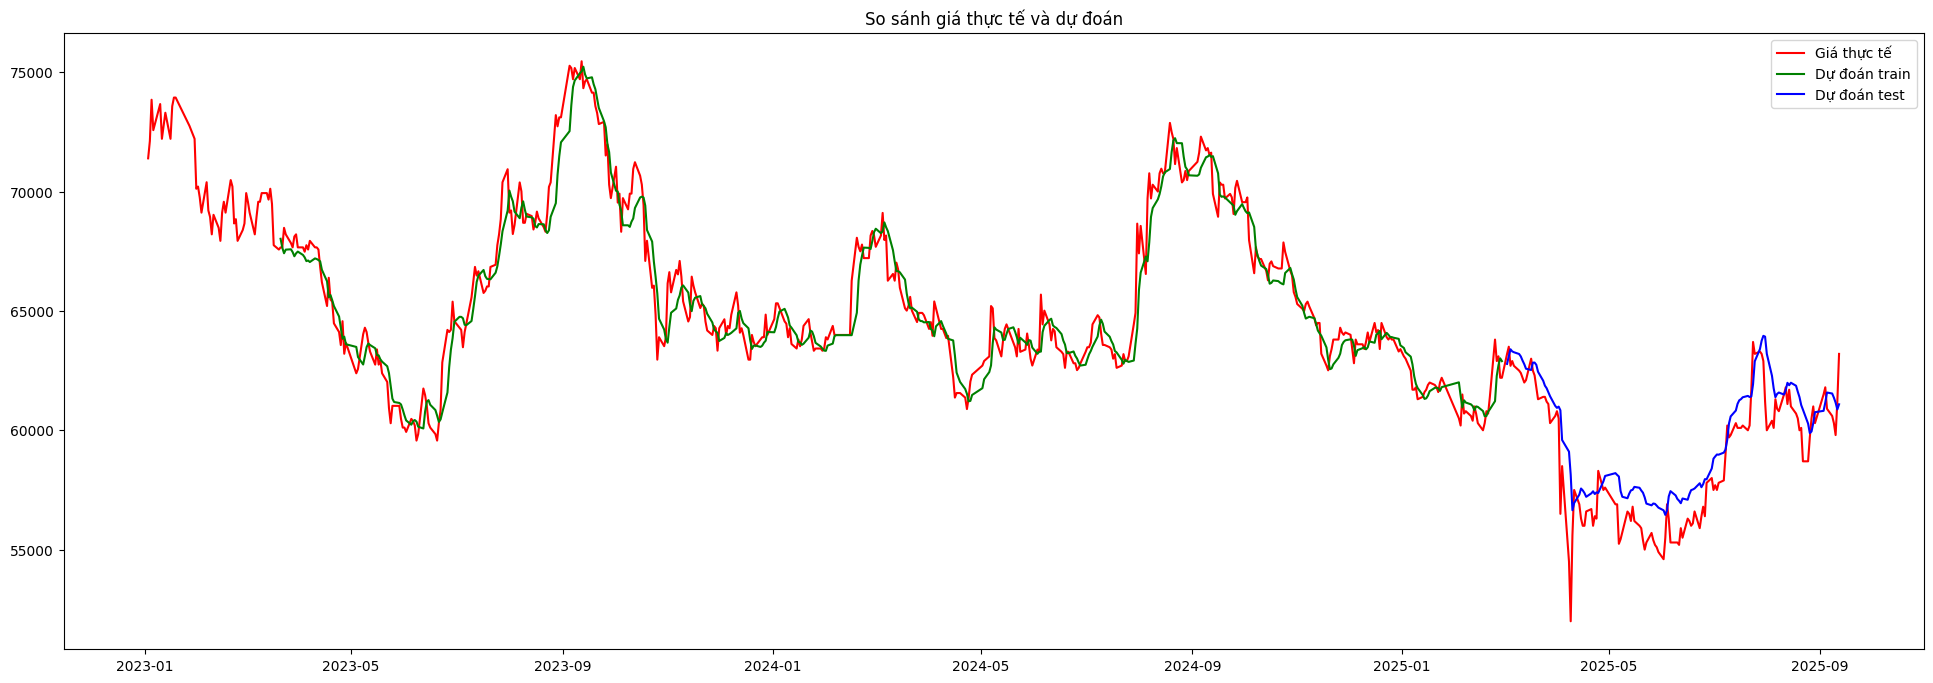

In [217]:
model_best = LSTMModel()
model_best.load_state_dict(torch.load("lstm_weights3.pth"))
model_best.eval()

# ======================
# 6. Dự đoán train/test
# ======================
with torch.inference_mode():
    y_train_pred = model_best(x_train).detach().numpy()
    y_test_pred  = model_best(x_test).detach().numpy()

y_train_predict = sc_y.inverse_transform(y_train_pred)
y_test_predict  = sc_y.inverse_transform(y_test_pred)

# ======================
# 7. Vẽ kết quả
# ======================
plt.figure(figsize=(24,8))
plt.plot(df1.index, df1['Close'], label="Giá thực tế", color="red")

# Train predict
train_index = df1.index[50:len(train_data)]
plt.plot(train_index, y_train_predict, label="Dự đoán train", color="green")

# Test predict
test_index = df1.index[len(train_data):len(df1)]
plt.plot(test_index, y_test_predict, label="Dự đoán test", color="blue")

plt.title("So sánh giá thực tế và dự đoán")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_))
mape = np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")